# Tarea 1 - exploración de datos Y PCA


## Punto no1

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import math

df = pd.read_csv("../data/DEPARTMENTS.csv")
column_1 = df['PIB millones']
column_2 = df['Población']
column_3 = df['PIB per capita millones']

In [11]:
df

,Departamento,PIB millones,Población,PIB per capita millones
0,Amazonas,1.067856e+06,76589,13.942677
1,Antioquia,2.125150e+08,6407102,33.168655
2,Arauca,8.548115e+06,262174,32.604738
3,Atlántico,6.376477e+07,2535517,25.148627
4,Bogotá D.C.,3.572586e+08,7412566,48.196349
5,Bolívar,5.140435e+07,2070110,24.831701
6,Boyacá,3.885816e+07,1217376,31.919606
7,Caldas,2.395311e+07,998255,23.994984
8,Caquetá,5.461367e+06,401849,13.590594
9,Casanare,2.366066e+07,420504,56.267378


## 1.1 ¿Cuál es la media, mediana y desviación estándar?, y la moda y los valores repeticiones de la moda para los datos categóricos

### Media

In [12]:
def calculate_mean(column):
    return column.sum() / len(column)
    
mean_1 = calculate_mean(column_1)
mean_2 = calculate_mean(column_2)
mean_3 = calculate_mean(column_3)

print(f"Mean of PIB : {mean_1}")
print(f"Mean of Population: {mean_2}")
print(f"Mean of PIB per capita: {mean_3}")

Mean of PIB : 44318861.805990905
Mean of Population: 1462378.606060606
Mean of PIB per capita: 24.40785586842424


### Median

In [13]:
def calculate_median(column):
    n = len(column)
    sortedColumn = sorted(column)
    if n % 2 == 0:
        median = (sortedColumn[n//2 - 1] + sortedColumn[n//2]) / 2
    else:
        median = sortedColumn[n//2]
    return median

# Calculate median
median_1 = calculate_median(column_1)
median_2 = calculate_median(column_2)
median_3 = calculate_median(column_3)

print(f"Median of PIB: {median_1}")
print(f"Median of Population: {median_2}")
print(f"Median of PIB per capita: {median_3}")

Median of PIB: 23660657.37
Median of Population: 1039722
Median of PIB per capita: 22.8826324


### Standard Deviation

In [14]:
def calculate_std_dev(column, mean):
    n = len(column)
    differences = [(value - mean) ** 2 for value in column]
    variance = sum(differences) / n
    std = variance ** 0.5
    return std

# Calculate standard deviation
std_1 = calculate_std_dev(column_1, mean_1)
std_2 = calculate_std_dev(column_2, mean_2)
std_3 = calculate_std_dev(column_3, mean_3)

print(f"Standard Deviation of GDP Millions: {std_1}")
print(f"Standard Deviation of Population: {std_2}")
print(f"Standard Deviation of GDP per capita Millions: {std_3}")

Standard Deviation of GDP Millions: 70579141.03250532
Standard Deviation of Population: 1679508.5872436275
Standard Deviation of GDP per capita Millions: 12.57181023560453


### Mode

In [15]:
from collections import Counter

def calculate_mode(column):
    count = Counter(column)
    mode = count.most_common(1)
    
    if len(mode) == 0 or mode[0][1] == 1:
        print("There isn't a specific mode")
        return
    
    mode = mode[0][0]

    print(f"Mode: {mode}")
    print("Recount:")
    for key, value in count.items():
        print(f"  {key}: {value}")
print("The mode of the PIB is:")
calculate_mode(column_1)
print("The mode of the Population is:")
calculate_mode(column_2)
print("The mode of the PIB per capita is:")
calculate_mode(column_3)

The mode of the PIB is:
There isn't a specific mode
The mode of the Population is:
There isn't a specific mode
The mode of the PIB per capita is:
There isn't a specific mode


## 1.2 Dibujar un boxplot a mano. Utilizando los datos de la tabla 1 y las siguientes proporciones.

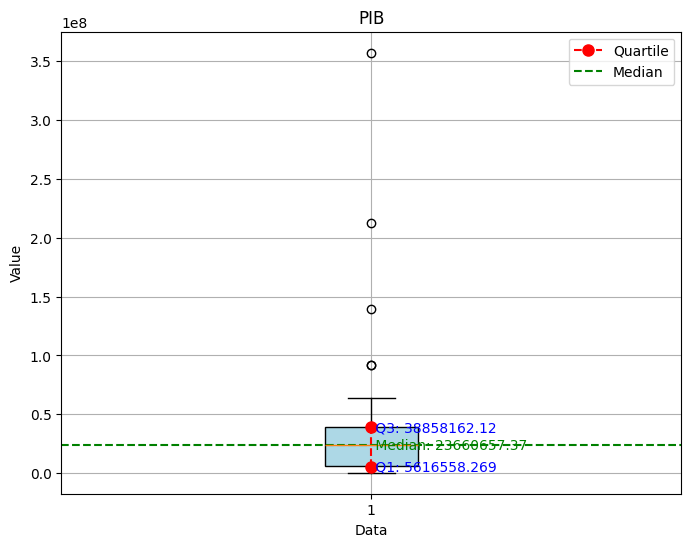

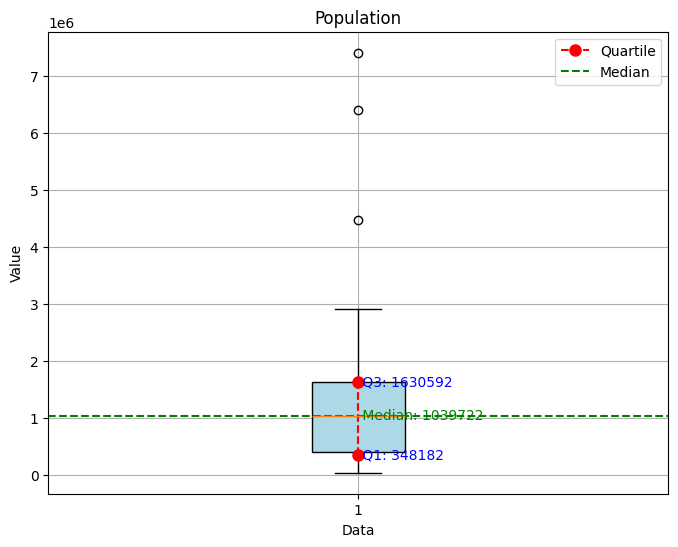

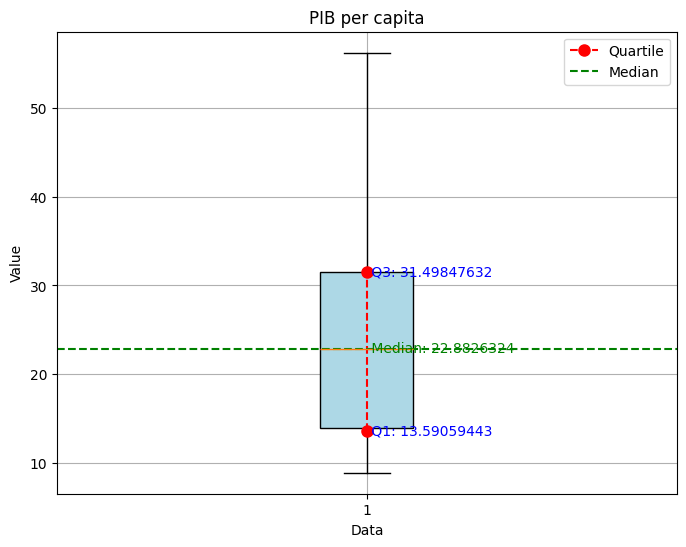

In [16]:
def calculate_quartile(column):
    n = len(column)
    ordered_column = sorted(column)
    if n % 2 == 0:
        q1_index = n // 4
        q3_index = 3 * (n // 4)
        q1 = (ordered_column[q1_index - 1] + ordered_column[q1_index]) / 2
        q3 = (ordered_column[q3_index - 1] + ordered_column[q3_index]) / 2
    else:
        q1_index = (n + 1) // 4
        q3_index = 3 * (n + 1) // 4
        q1 = ordered_column[q1_index - 1]
        q3 = ordered_column[q3_index - 1]
    
    return q1, q3

def manual_boxplot(column, median, name_boxplot):
    q1, q3 = calculate_quartile(column)
    plt.figure(figsize=(8, 6))
    box = plt.boxplot(column, patch_artist=True)

    plt.plot([1, 1], [q1, q3], 'r--', marker='o', markersize=8, label='Quartile')
    plt.axhline(y=median, color='g', linestyle='--', label='Median')

    colors = ['lightblue', 'lightgreen', 'lightyellow']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    plt.text(1, q1, f' Q1: {q1}', horizontalalignment='left', verticalalignment='center', fontsize=10, color='blue')
    plt.text(1, q3, f' Q3: {q3}', horizontalalignment='left', verticalalignment='center', fontsize=10, color='blue')
    plt.text(1, median, f' Median: {median}', horizontalalignment='left', verticalalignment='center', fontsize=10, color='green')
    plt.title(name_boxplot)
    plt.xlabel('Data')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)

manual_boxplot(column_1, median_1, 'PIB')
manual_boxplot(column_2, median_2, 'Population')
manual_boxplot(column_3, median_3, 'PIB per capita')

## 1.3 Cual es la covarianza entre las 2 variables X1, X2

In [17]:
def calculate_covariance(column_x1, column_x2):
    mean_x1 = calculate_mean(column_x1)
    mean_x2 = calculate_mean(column_x2)

    return sum((column_x1[i] - mean_x1) * (column_x2[i] - mean_x2) for i in range(len(column_x1))) / len(column_x1)
covariance = calculate_covariance(column_1, column_2)
print(f"the covariance is: {covariance}")

the covariance is: 113233718703629.06


## 1.4 Cuál es la correlación entre la variable x1 y x2

In [18]:
def calculate_numerator(column_x1, column_x2):
    
    mean_x1 = calculate_mean(column_x1)
    mean_x2 = calculate_mean(column_x2)
    numerator = 0
    for i in range(len(column_x1)):
        std_1 = column_x1[i] - mean_x1
        std_2 = column_x2[i] - mean_x2
        numerator += std_1 * std_2
    return numerator

def calculate_denominator(column):
    sum = 0
    mean = calculate_mean(column)
    for value in column:
        std = value - mean
        square_std = std ** 2
        sum += square_std
    return math.sqrt(sum)

def calculate_correlation(column_1, column_2):
    numerator = calculate_numerator(column_1, column_2)
    denominator = calculate_denominator(column_1) * calculate_denominator(column_2)
    correlation = numerator / denominator
    return correlation

print(f"the correlation is: {calculate_correlation(column_1, column_2)}")

the correlation is: 0.9552502783564497


## 1.5 Explica la relación entre covarianza y correlación

Covariance and correlation are functions designed to measure the linear connection between two variables. Both metrics evaluate the strength and direction of this relationship, showing negative values for inverse associations, zero for weak or non-existent connections, and positive values for direct correlations.

In contrast to covariance, the Pearson correlation offers a normalized perspective. Its standard values proceed from dividing covariance by the product of the standard deviations of the two variables.

## 1.6 Calcule el resultado del algoritmo K-means sobre este set de datos a mano como lo hicimos en excel. Vamos a crear 4 grupos, es decir, k=4 (clusters)

-------------------------------------------------
	* Centroid (5435949.991649998, 332024.2): 0
	- 63764770.77, 2535517.0
	- 51404352.37, 2070110.0
	- 38858162.12, 1217376.0
	- 23953112.45, 998255.0
	- 23660657.37, 420504.0
	- 25758151.71, 1464488.0
	- 37523918.98, 1200574.0
	- 24991953.76, 1784783.0
	- 24011616.06, 1100386.0
	- 22262575.88, 880560.0
	- 19738417.36, 1341746.0
	- 58439500.07, 1039722.0
	- 21775426.15, 1630592.0
	- 23056874.23, 1491689.0
	- 23786362.42, 943401.0
	- 30438180.15, 1330187.0
	* Centroid (178771870.428, 4679890.2): 1
	- 1067855.672, 76589.0
	- 8548114.653, 262174.0
	- 5461366.78, 401849.0
	- 6001844.915, 534826.0
	- 1123857.696, 82767.0
	- 5616558.269, 348182.0
	- 11941644.16, 539904.0
	- 2125410.333, 61280.0
	- 11516270.76, 904863.0
	- 956576.6785, 107808.0
	* Centroid (32089001.990624998, 1340618.125): 2
	- 212514957.4, 6407102.0
	- 357258620.8, 7412566.0
	- 91945942.28, 2919060.0
	- 92276678.16, 2184837.0
	- 139863153.5, 4475886.0
	* Centroid (439777.8456, 

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5664\591790187.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return math.sqrt((point_p[0] - point_q[0]) ** 2 + (point_p[1] - point_q[1]) ** 2)


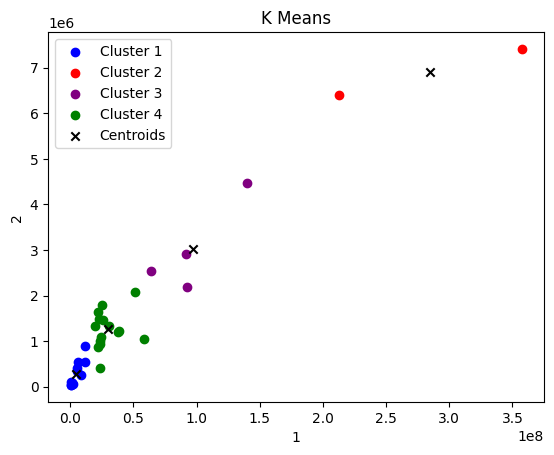

In [19]:
import numpy as np
import math

def show_centroids(titles, clusters, final_centroids):
    color_list = ['blue', 'red', 'purple', 'green']
    for cluster_index, cluster_points in clusters.items():
        cluster_points = np.array(cluster_points)
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color_list[cluster_index],
                    label=f'Cluster {cluster_index + 1}')

    final_centroids = np.array(final_centroids)

    plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='black', marker='x', label='Centroids')
    plt.xlabel(titles[0])
    plt.ylabel(titles[1])
    plt.legend()
    plt.title("K Means")
    plt.show()

# Calculate K-Means
def print_calculation(clusters, centroids):
    print("-------------------------------------------------")
    for i, centroid in enumerate(centroids):
        print(f"\t* Centroid ({centroid[0]}, {centroid[1]}): {i}")
        for point in clusters[i]:
            print(f"\t- {point[0]}, {point[1]}")
    print("----------------------------------------------------")

def euclidean_distance(point_p, point_q):
    return math.sqrt((point_p[0] - point_q[0]) ** 2 + (point_p[1] - point_q[1]) ** 2)

def assign_clusters(data, centroids):
    clusters = {}
    for index, row in data.iterrows():
        distances = [euclidean_distance(row, centroid) for centroid in centroids]
        cluster_assignment = np.argmin(distances)
        if cluster_assignment not in clusters:
            clusters[cluster_assignment] = [row.values]
        else:
            clusters[cluster_assignment].append(row.values)
    return clusters

def update_centroids(clusters):
    centroids = [np.mean(cluster, axis=0) for cluster in clusters.values()]
    return centroids

def calculate_k_means(data, k, max_iterations=100):
    # Centroid initialization
    initial_centroids_indices = np.random.choice(len(data), k, replace=False)
    centroids = data.iloc[initial_centroids_indices].values

    while_counter = 1
    is_calculation_finished = False
    while not is_calculation_finished and while_counter <= max_iterations:
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(clusters)

        if while_counter == max_iterations:
            print("Warning, maximum number of iterations reached without convergence.")    
        elif np.all(np.isclose(centroids, new_centroids)):
            is_calculation_finished = True
        else:
            centroids = new_centroids
            
        print_calculation(clusters, centroids)
        while_counter += 1
    return clusters, centroids

k = 4
df_kmeans = pd.DataFrame({'column_1': column_1, 'column_2': column_2})

clusters, centroids = calculate_k_means(df_kmeans, k)
show_centroids(["1", "2"], clusters, centroids)